In [3]:
import os

# Path to your dataset directory
dataset_dir = r"D:\Sakshaat\ALL PROJECTS\Brain Tumor Classification\mri"  # Replace with the path to your dataset folder

# List all files in the directory and its subdirectories
for dirname, _, filenames in os.walk(dataset_dir):
    for filename in filenames:
        print(os.path.join(dirname, filename))

D:\Sakshaat\ALL PROJECTS\Brain Tumor Classification\mri\Testing\glioma_tumor\image(1).jpg
D:\Sakshaat\ALL PROJECTS\Brain Tumor Classification\mri\Testing\glioma_tumor\image(10).jpg
D:\Sakshaat\ALL PROJECTS\Brain Tumor Classification\mri\Testing\glioma_tumor\image(100).jpg
D:\Sakshaat\ALL PROJECTS\Brain Tumor Classification\mri\Testing\glioma_tumor\image(11).jpg
D:\Sakshaat\ALL PROJECTS\Brain Tumor Classification\mri\Testing\glioma_tumor\image(12).jpg
D:\Sakshaat\ALL PROJECTS\Brain Tumor Classification\mri\Testing\glioma_tumor\image(13).jpg
D:\Sakshaat\ALL PROJECTS\Brain Tumor Classification\mri\Testing\glioma_tumor\image(14).jpg
D:\Sakshaat\ALL PROJECTS\Brain Tumor Classification\mri\Testing\glioma_tumor\image(15).jpg
D:\Sakshaat\ALL PROJECTS\Brain Tumor Classification\mri\Testing\glioma_tumor\image(16).jpg
D:\Sakshaat\ALL PROJECTS\Brain Tumor Classification\mri\Testing\glioma_tumor\image(17).jpg
D:\Sakshaat\ALL PROJECTS\Brain Tumor Classification\mri\Testing\glioma_tumor\image(18).jpg

In [4]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout
from sklearn.metrics import accuracy_score

In [5]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.keras.models import Sequential

Folder Path Setup

In [6]:
x_train = []
y_train = []
image_size = 150
labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
#For Training
for i in labels:
    folderPath = os.path.join(r'D:\Sakshaat\ALL PROJECTS\Brain Tumor Classification\mri\Training', i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, j))
        img = cv2.resize(img,(image_size, image_size))
        x_train.append(img)
        y_train.append(i)

#For Testing...Not using different labels taaki jevha test train hoil motha dataset milel to validate!   
for i in labels:
    folderPath = os.path.join(r'D:\Sakshaat\ALL PROJECTS\Brain Tumor Classification\mri\Testing', i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, j))
        img = cv2.resize(img,(image_size, image_size))
        x_train.append(img)
        y_train.append(i)
        
x_train = np.array(x_train)
y_train = np.array(y_train)

In [6]:
x_train, y_train = shuffle(x_train, y_train, random_state=101)
# If i shuffle them seperately then values will be shuffled alternatively...Pan aaplyala same hava aahe no seperate alteration
x_train.shape

(3264, 150, 150, 3)

Train test Split

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.2, random_state=101)

In [8]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

Convolutional Neural Network

In [9]:
#Inner Neural Network
model = Sequential()
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(Conv2D(256, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation = 'softmax')) #No of categories...As this is the output layer...Softmax used for probability
#Probability is like pratyek image la probability denar.....Tya hishobaane max probability la output denar

d:\Sakshaat\ALL PROJECTS\Brain Tumor Classification\tumorenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 146, 146, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 71, 71, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 69, 69, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 69, 69, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 30, 30, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 10, 10, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,277,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,447,044 (16.96 MB)

 Trainable params: 4,447,044 (16.96 MB)

 Non-trainable params: 0 (0.00 B)

Compile Model as a Whole

In [11]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy']) #Change the optimizer later and add loss in metrics for practice

Loss should decrease and accuracy should increase

In [12]:
history = model.fit(x_train, y_train, epochs = 20, validation_split = 0.1) #Change epochs for better accuracy

Epoch 1/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.2940 - loss: 3.2982 - val_accuracy: 0.2710 - val_loss: 1.3632
Epoch 2/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 107s 1s/step - accuracy: 0.3575 - loss: 1.3282 - val_accuracy: 0.4733 - val_loss: 1.2119
Epoch 3/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 124s 2s/step - accuracy: 0.5479 - loss: 1.0759 - val_accuracy: 0.5420 - val_loss: 1.0308
Epoch 4/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 119s 2s/step - accuracy: 0.5883 - loss: 0.9336 - val_accuracy: 0.6298 - val_loss: 0.8691
Epoch 5/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 120s 2s/step - accuracy: 0.6819 - loss: 0.8097 - val_accuracy: 0.5840 - val_loss: 0.9074
Epoch 6/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 155s 2s/step - accuracy: 0.7009 - loss: 0.7191 - val_accuracy: 0.6679 - val_loss: 0.7705
Epoch 7/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 153s 2s/step - accuracy: 0.7402 - loss: 0.6112 - val_accuracy: 0.5802 - val_loss: 1.0396
Epoch 8/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 150s 2s/step - accuracy: 0.7708 - loss: 0.5611 - val_accuracy: 0.5611 - v

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

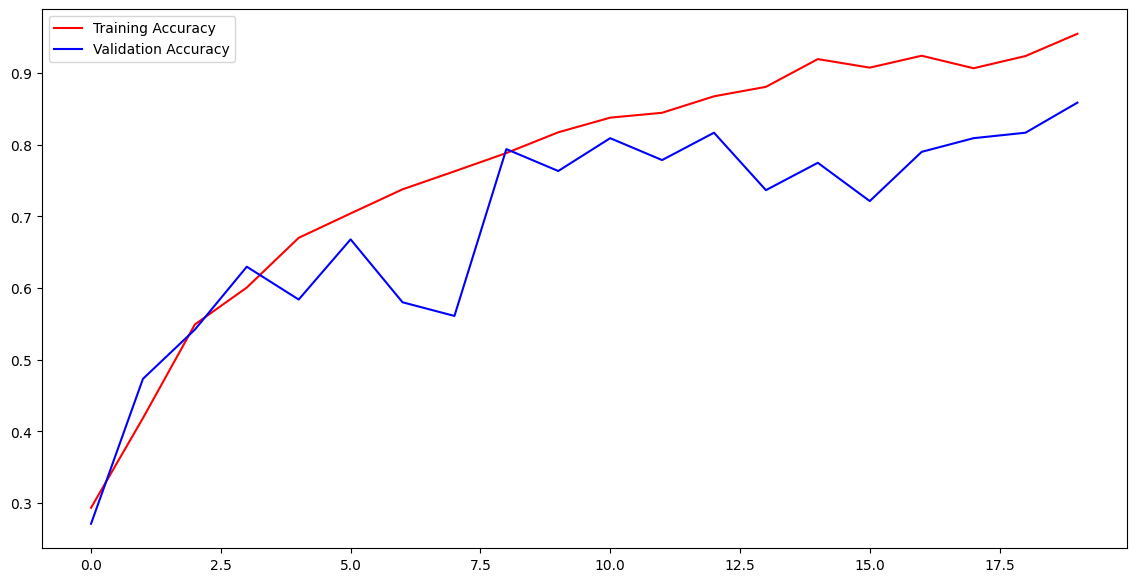

In [ ]:
#model.save('braintumor.h5').....Change this when new epochs and new variables vaaprega

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

fig = plt.figure(figsize = (14,7))
plt.plot(epochs, acc, 'r', label = "Training Accuracy")
plt.plot(epochs, val_acc, 'b', label = "Validation Accuracy")
plt.legend(loc = 'upper left')
plt.show()

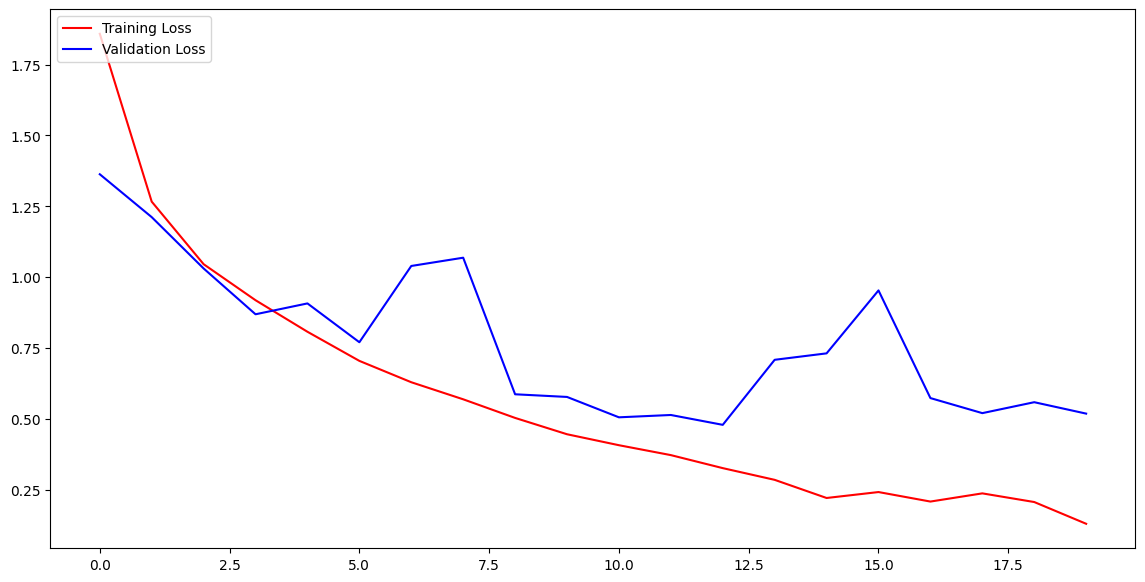

In [18]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))

fig = plt.figure(figsize = (14,7))
plt.plot(epochs, loss, 'r', label = "Training Loss")
plt.plot(epochs, val_loss, 'b', label = "Validation Loss")
plt.legend(loc = 'upper left')
plt.show()

Prediction

In [2]:
img = cv2.imread(r'D:\Sakshaat\ALL PROJECTS\Brain Tumor Classification\mri\Testing\meningioma_tumor\image(4).jpg')
img = cv2.resize(img, (150,150))
img_array = np.array(img)
img_array.shape

NameError: name 'cv2' is not defined

In [26]:
img_array = img_array.reshape(1, 150, 150, 3)
img_array.shape

(1, 150, 150, 3)

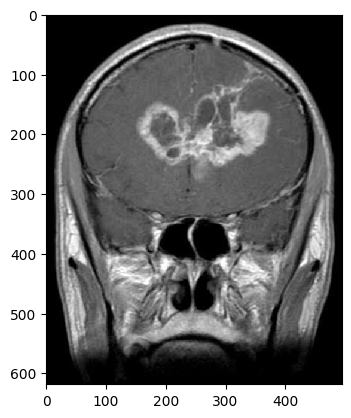

In [27]:
from tensorflow.keras.preprocessing import image
img = image.load_img(r'D:\Sakshaat\ALL PROJECTS\Brain Tumor Classification\mri\Testing\glioma_tumor\image(1).jpg')
plt.imshow(img, interpolation='nearest')
plt.show()

In [28]:
a = model.predict(img_array)
indices = a.argmax()
indices

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


np.int64(0)